In [1]:
import numpy as np
import matplotlib.pyplot as plt
import island_evo_simulation_methods as ie
from scipy.stats import norm

In [2]:
%matplotlib inline

font = {'family' : 'serif',
        'size'   : 16}
text = {'usetex' : True}

plt.rc('font', **font)
plt.rc('text',**text)
plt.rc('axes', titlesize=18)

In [3]:
file_name = 'epoch_time_scaling0_summary.npz'
with np.load(file_name) as file:
    data = file['data'].item()

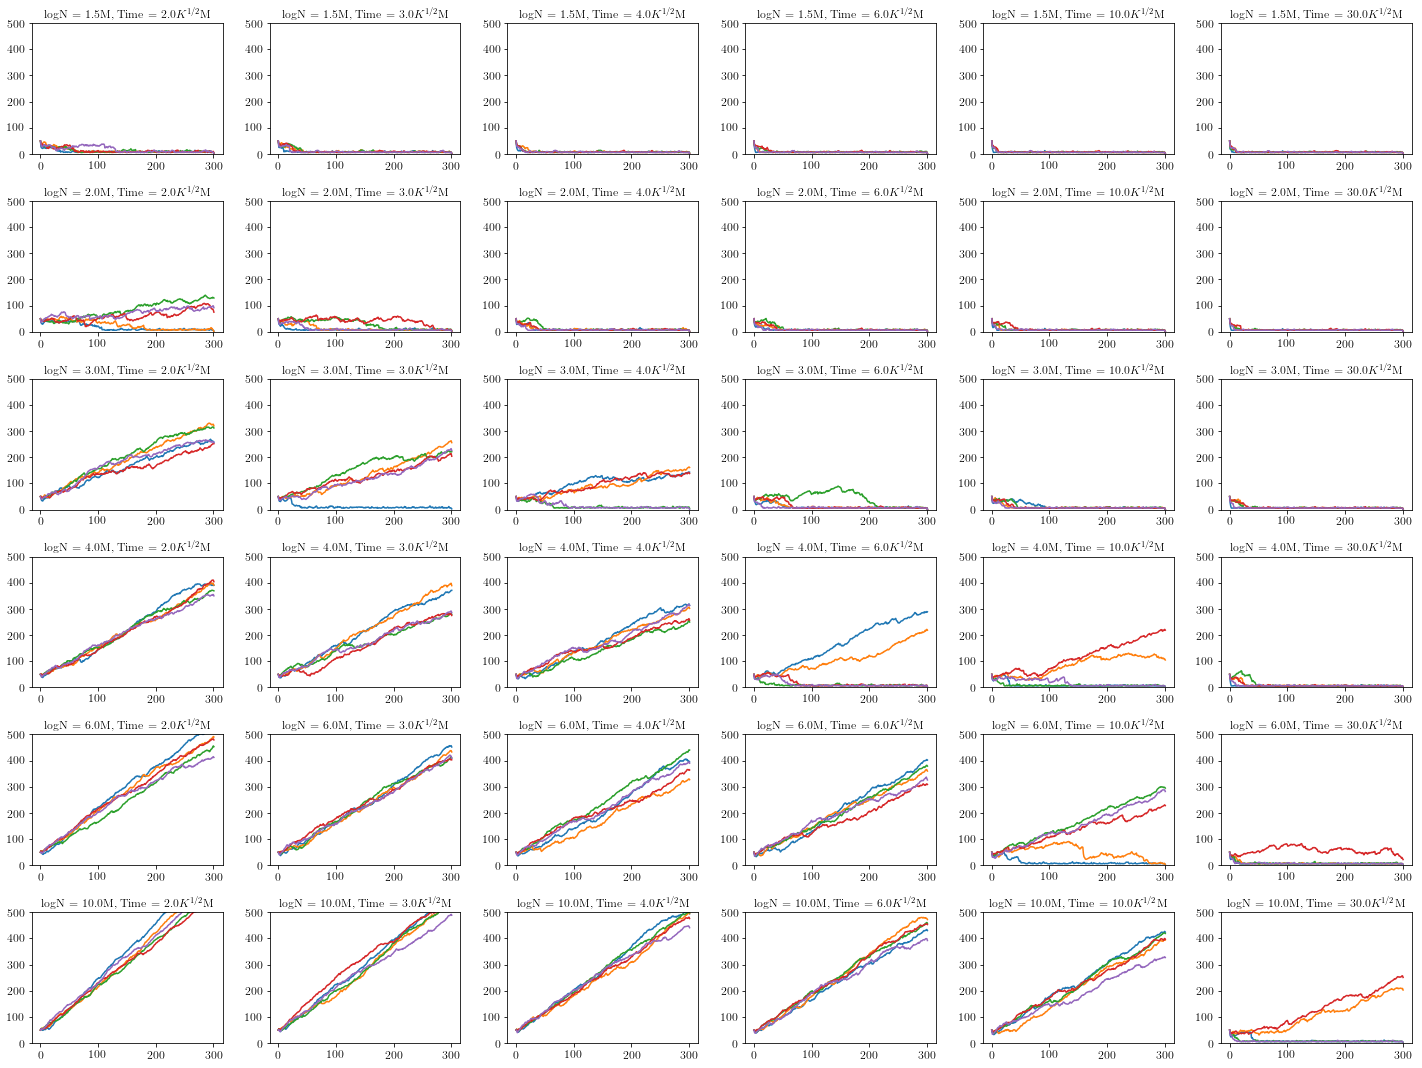

In [32]:
t_num = data['t_num']
thresh_num = data['thresh_num']
rep_num = data['rep_num']

logN_vec = data['logN_vec']
M = data['M']
epoch_timescale_vec = data['epoch_timescale_vec']

num_alive_array = data['num_alive_array']

plt.figure(figsize=(20, 15))
for thresh_ind in range(thresh_num):
    for t_ind in range(t_num):
        
        plt.subplot(thresh_num,t_num,t_num*thresh_ind+t_ind+1)
        for rep_ind in range(rep_num):
            plt.plot(num_alive_array[t_ind,thresh_ind,rep_ind])
            
        plt.ylim((0,500))
        
        plt.title(r'logN = {}M, Time = {}$K^{{1/2}}$M'.format(logN_vec[thresh_ind]/M,epoch_timescale_vec[t_ind]))

plt.tight_layout()

In [3]:
file_name = 'epoch_time_scaling0_t2_thresh5_rep0.npz'
with np.load(file_name) as data:
    exp_data = data['class_obj'].item()
        
print(list(exp_data.keys()))

['n2_mean_ave_list', 'mig_mean_list', 'eta_mean_list', 'dt', 'lambda_mean_std_list', 'n_alive', 'lambda_mean_ave_list', 'file_name', 'N', 'm', 'K_tot', 'K', 'n_cross_mean_list', 'epoch_time_list', 'inv_fac', 'D', 'gamma', 'mu', 'M', 'epoch_num', 'sample_num', 'dt_list', 'thresh', 'n_traj_eq', 'n2_mean_std_list', 'V', 'seed', 'increment', 'eta_list', 'n_traj_f', 'n_mean_std_list', 'epoch_timescale', 'extinct_time_array', 'n_mean_ave_list', 'n_init_list']


In [32]:
n_mean_array = exp_data['n_mean_ave_list']
n_alive_array = exp_data['n_alive']
V_full = exp_data['V']
gamma = exp_data['gamma']

ind = 20

n_alive = n_alive_array[:,ind]
n_mean = n_mean_array[ind]
V = V_full[n_alive,:][:,n_alive]

K = np.sum(n_alive)

interactions = V @ n_mean

diff = -5
chi0 = np.mean(interactions)/(gamma*np.mean(n_mean))
bias0 = interactions - gamma*(chi0)*n_mean
bias0

chi1 = chi0

while diff<0:    
    bias1 = interactions - gamma*(chi1)*n_mean

    positive_mean = np.mean(bias1[bias1>0])
    negative_mean = np.mean(bias1[bias1<0])
    diff = positive_mean - np.abs(negative_mean)
    print([chi1, positive_mean,negative_mean])
    
    chi1 = chi1+0.05

print([])  
chi2 = chi0
diff = 10
while diff>0.01/np.sqrt(K):
    bias2 = interactions - gamma*(chi2)*n_mean
    
    bias_plus = np.mean(bias2[bias2>0])
    bias_minus = np.mean(bias2[bias2<0])
    n_plus = np.mean(n_mean[bias2>0])
    n_minus = np.mean(n_mean[bias2<0])
    chi2 = chi2 + (bias_plus + bias_minus)/(gamma*(n_plus + n_minus))
    diff = np.abs(bias_plus+bias_minus)
    
    print([chi2, bias_plus, bias_minus])

[0.10827419934647543, 0.04966931066317357, -0.057430140454294454]
[0.15827419934647544, 0.05060250450657182, -0.05710289583572366]
[0.20827419934647545, 0.05018367672241182, -0.05861224888553707]
[0.25827419934647544, 0.049828582361753526, -0.0602771570702796]
[0.30827419934647543, 0.05076995531057884, -0.06000094190375249]
[0.3582741993464754, 0.051711328259404145, -0.059724726737225384]
[0.4082741993464754, 0.05265270120822944, -0.059448511570698276]
[0.4582741993464754, 0.05359407415705474, -0.059172296404171175]
[0.5082741993464754, 0.05318287766927354, -0.06094190023348074]
[0.5582741993464755, 0.054111643118209464, -0.06067123188718547]
[0.6082741993464755, 0.055040408567145406, -0.060400563540890205]
[0.6582741993464756, 0.05596917401608135, -0.06012989519459495]
[0.7082741993464756, 0.056897939465017276, -0.05985922684829969]
[0.7582741993464757, 0.05782670491395321, -0.05958855850200442]
[0.8082741993464757, 0.05875547036288915, -0.05931789015570915]
[0.8582741993464758, 0.059

(array([ 1.,  0.,  1.,  1.,  3., 12., 20., 19.,  7.,  5.]),
 array([-0.33235172, -0.28186268, -0.23137365, -0.18088462, -0.13039559,
        -0.07990655, -0.02941752,  0.02107151,  0.07156055,  0.12204958,
         0.17253861]),
 <a list of 10 Patch objects>)

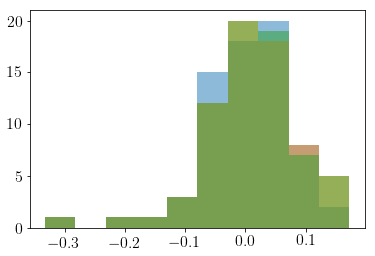

In [33]:
plt.hist(bias0,alpha=0.5)
plt.hist(bias1,alpha=0.5)
plt.hist(bias2,alpha=0.5)

In [52]:
ii = np.argmax(bias0)
bias0[ii]+gamma*chi0*n_mean[ii]

0.03173199804563578

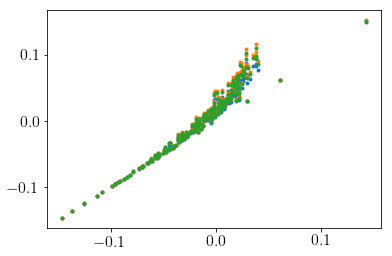

In [21]:
plt.plot(interactions,bias0,'.')
plt.plot(interactions,bias1,'.')
plt.plot(interactions,bias2,'.')


In [13]:
np.sqrt(K)/np.sqrt(2)

15.842979517754857

In [17]:
np.sqrt(np.var(V))*np.sqrt(K)

22.428672761692297